In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

dataTrain = pd.read_csv('diamonds 0.csv')

dataTrain.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
type(dataTrain)  #data type

pandas.core.frame.DataFrame

In [4]:
dataTrain.shape # check dimension

(50000, 10)

In [5]:
dataTrain.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
dataTrain = dataTrain.dropna()


In [7]:
dataTrain.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
dataTrain.shape # 15 rows removed

(50000, 10)

In [9]:
dataTrain.dtypes  # checking the data type of every column

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

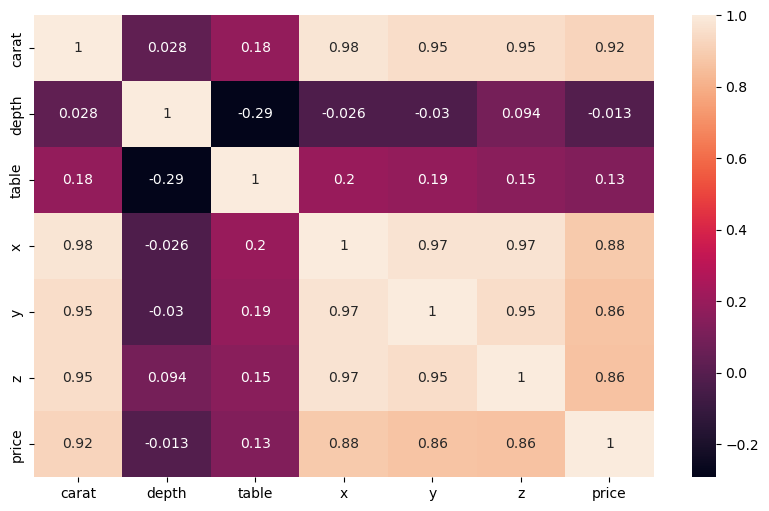

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
 dataTrain.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,carat,depth,table,x,y,z,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,5.734403,5.737956,3.541056,3944.805440
std,0.475173,1.431088,2.232092,1.123077,1.145579,0.707065,3997.938105
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2410.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5351.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [13]:
#Search for price = 1 , if so, change the price to 500
dataTrain.loc[dataTrain['price'] == 1, 'price'] = 500

In [14]:
dataTrain.describe()  # now still the minimum price is 1.42 USD

,carat,depth,table,x,y,z,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,5.734403,5.737956,3.541056,3944.805440
std,0.475173,1.431088,2.232092,1.123077,1.145579,0.707065,3997.938105
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,951.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2410.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5351.000000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


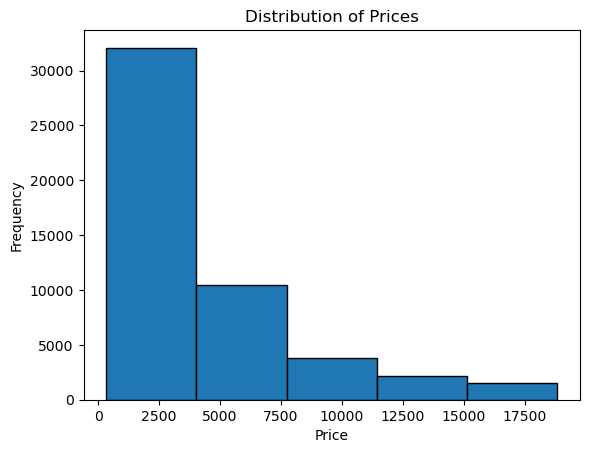

In [15]:
import matplotlib.pyplot as plt

dataTrain['price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [16]:
dataTrain.describe(include = 'object') #summary statistics for categorical values

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,19938,10452,12115


<Axes: xlabel='carat', ylabel='price'>

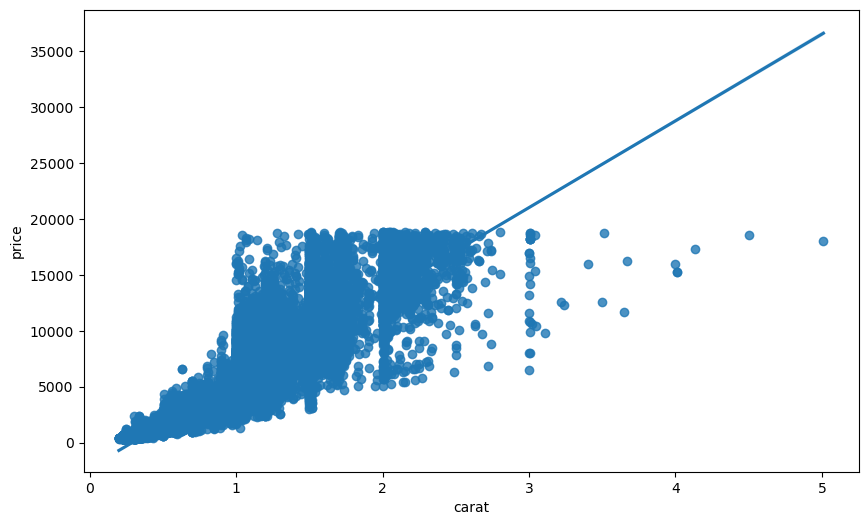

In [17]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="carat", y="price", data=dataTrain)

In [18]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['carat'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.921803735315102  with a P-value of P = 0.0


<Axes: xlabel='depth', ylabel='price'>

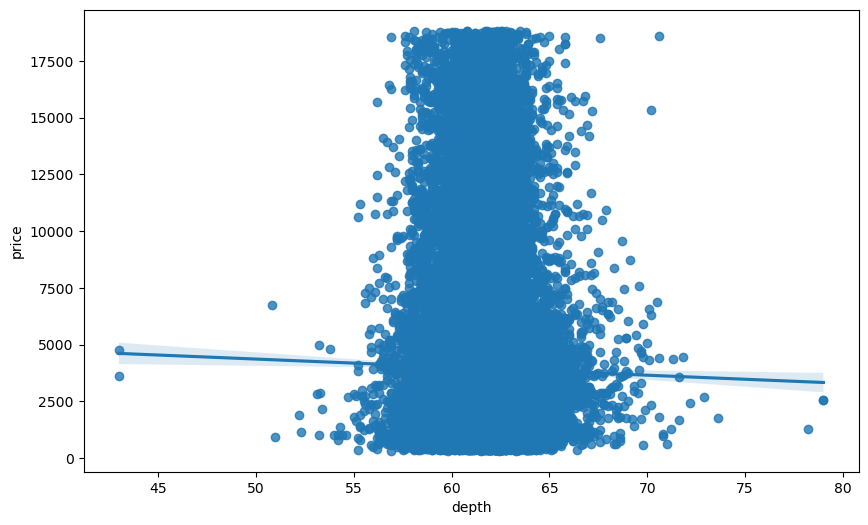

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x="depth", y="price", data=dataTrain)

In [20]:
pearson_coef, p_value = stats.pearsonr(dataTrain['depth'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.012730592135305412  with a P-value of P = 0.004417620294724437


<Axes: xlabel='table', ylabel='price'>

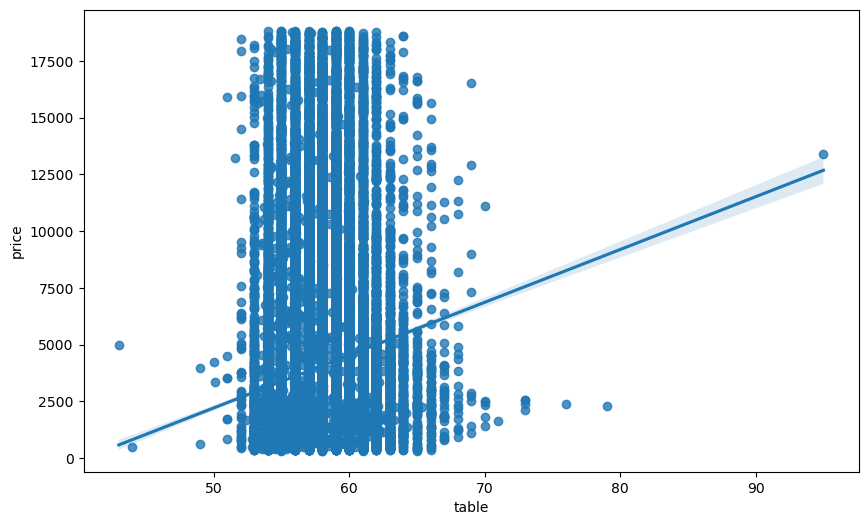

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(x="table", y="price", data=dataTrain)

In [25]:
pearson_coef, p_value = stats.pearsonr(dataTrain['depth'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.012730592135305412  with a P-value of P = 0.004417620294724437


<Axes: xlabel='carat', ylabel='price'>

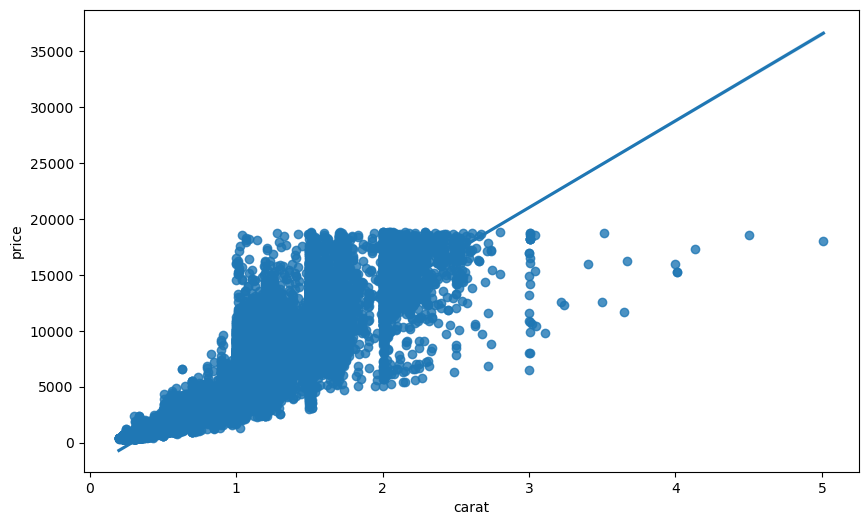

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x="carat", y="price", data=dataTrain)

In [29]:
pearson_coef, p_value = stats.pearsonr(dataTrain['carat'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.921803735315102  with a P-value of P = 0.0


<Axes: xlabel='table', ylabel='price'>

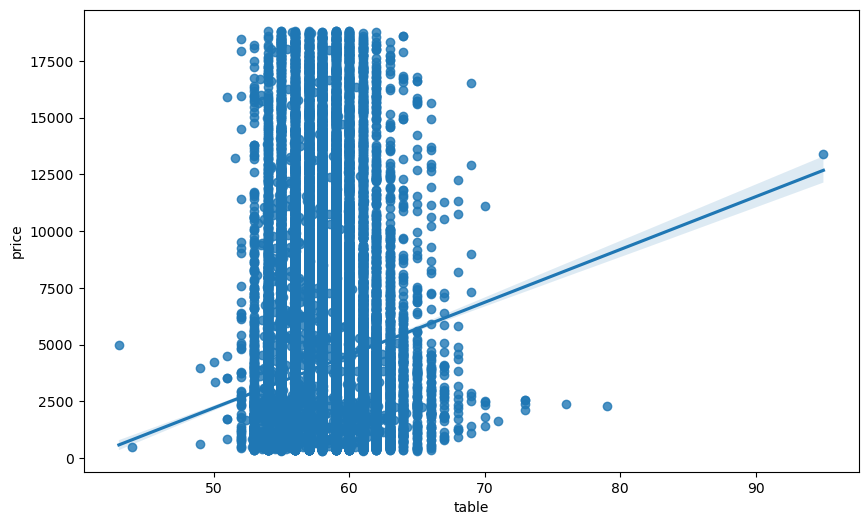

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x="table", y="price", data=dataTrain)

In [31]:
pearson_coef, p_value = stats.pearsonr(dataTrain['table'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.12984776440367518  with a P-value of P = 6.686214941820312e-187


<Axes: xlabel='y', ylabel='price'>

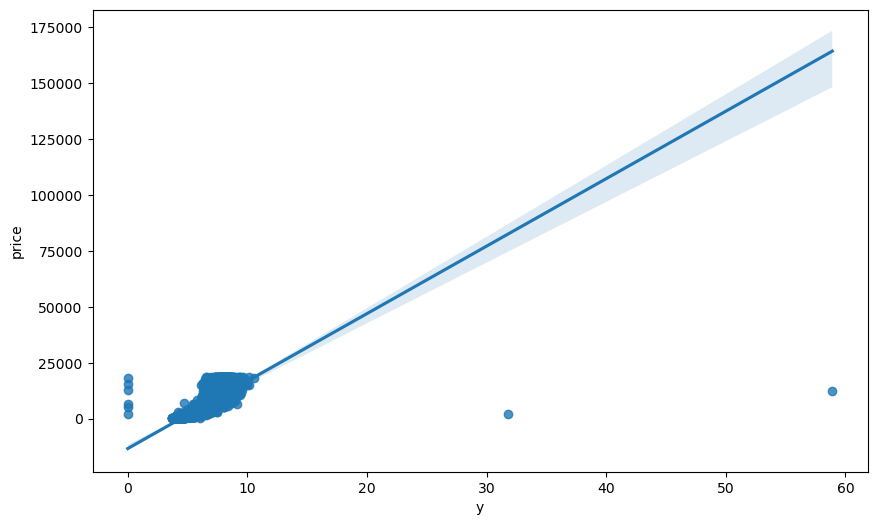

In [35]:
plt.figure(figsize=(10,6))
sns.regplot(x="y", y="price", data=dataTrain)

In [36]:
pearson_coef, p_value = stats.pearsonr(dataTrain['y'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8643927333814748  with a P-value of P = 0.0


<Axes: xlabel='color', ylabel='price'>

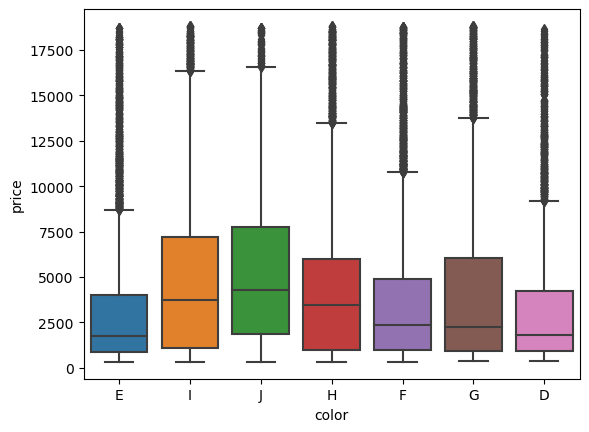

In [40]:
sns.boxplot(x="cut", y="price", data=dataTrain)

<Axes: xlabel='color', ylabel='price'>

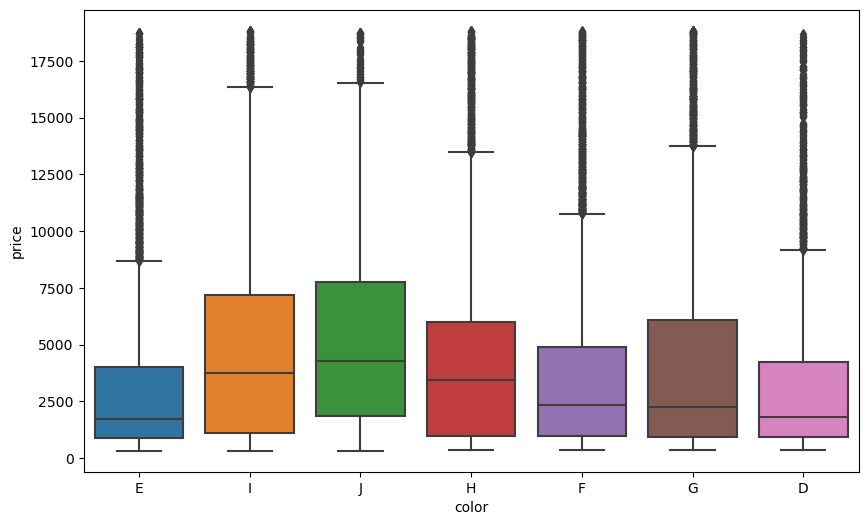

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x="color", y="price", data=dataTrain)

<Axes: xlabel='clarity', ylabel='price'>

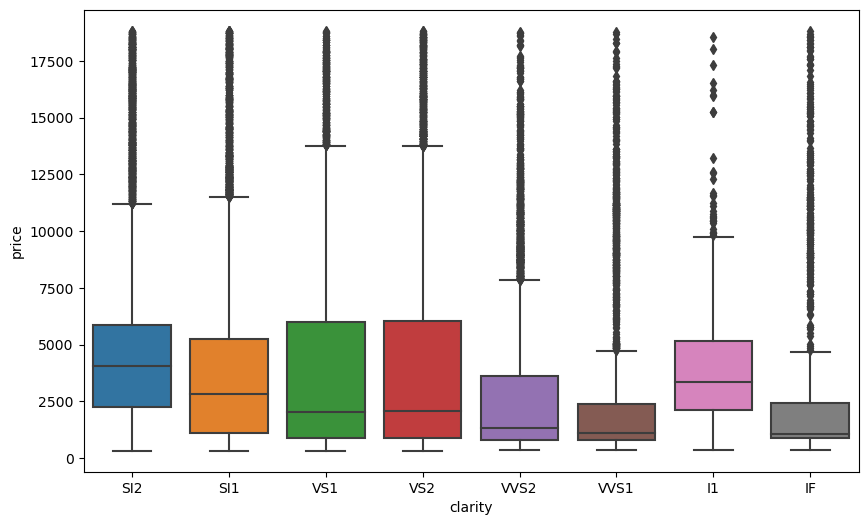

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x="clarity", y="price", data=dataTrain)

In [46]:
dataTrain.drop(['depth', 'x', 'y','z'], axis = 1, inplace = True)

In [47]:
dataTrain.shape


(50000, 6)

In [56]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.cut = labelencoder.fit_transform(dataTrain.cut)
dataTrain.color = labelencoder.fit_transform(dataTrain.color)
dataTrain.clarity = labelencoder.fit_transform(dataTrain.clarity)
dataTrain.table = labelencoder.fit_transform(dataTrain.table)
dataTrain.price = labelencoder.fit_transform(dataTrain.price)

In [57]:
labelencoder = LabelEncoder()
dataTrain.cut = labelencoder.fit_transform(dataTrain.cut)
dataTrain.color = labelencoder.fit_transform(dataTrain.color)
dataTrain.clarity = labelencoder.fit_transform(dataTrain.clarity)
dataTrain.table = labelencoder.fit_transform(dataTrain.table)
dataTrain.price = labelencoder.fit_transform(dataTrain.price)

In [58]:
dataTrain.head(10)

,carat,cut,color,clarity,table,price
0,0.23,2,1,3,30,0
1,0.21,3,1,2,90,0
2,0.23,1,1,4,114,1
3,0.29,3,5,5,60,2
4,0.31,1,6,3,60,3
5,0.24,4,6,7,50,4
6,0.24,4,5,6,50,4
7,0.26,4,4,2,30,5
8,0.22,0,1,5,90,5
9,0.23,4,4,4,90,6


In [59]:
# Calculate the z-score from with scipy
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)


In [60]:
dataTrain

,carat,cut,color,clarity,table,price
0,-1.198405,-0.538215,-0.940237,-0.485467,-1.137475,-1.036775
1,-1.240495,0.434451,-0.940237,-1.065794,1.667522,-1.036775
2,-1.198405,-1.510880,-0.940237,0.094860,2.789520,-1.036436
3,-1.072134,0.434451,1.412150,0.675187,0.265024,-1.036097
4,-1.030043,-1.510880,2.000246,-0.485467,0.265024,-1.035758
...,...,...,...,...,...,...
49995,-0.167191,-0.538215,-1.528334,-1.065794,-0.202476,-0.260418
49996,-0.167191,-1.510880,-1.528334,-1.065794,-1.137475,-0.260418
49997,-0.209281,1.407116,-1.528334,-1.065794,1.200022,-0.260418
49998,0.127442,0.434451,0.824053,-0.485467,0.265024,-0.260418


In [73]:
x_train=dataTrain.iloc[:,0:4]
y_train=dataTrain.iloc[:,5]


In [77]:
#In case you have no separate testing data, use the following code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
#30% of the trainng data will be used for testing

In [78]:
x_train.head()

,carat,cut,color,clarity
27763,-0.882727,-0.538215,0.824053,0.094860
14652,0.716707,-0.538215,0.235956,-0.485467
29662,-1.051088,-0.538215,-0.352141,0.675187
23502,-1.093179,1.407116,-0.940237,1.835842
4821,0.464164,-0.538215,1.412150,-0.485467


In [79]:
y_train.head()

27763   -0.912070
14652    0.840578
29662   -0.891060
23502   -0.936469
4821     0.065916
Name: price, dtype: float64

In [80]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [81]:
y_pred1 = model_mlr.predict(x_test)

In [83]:
#randomly checking the y-pred values
y_pred1[0]

-0.7881063225307224

In [84]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.09190598080620123


In [85]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.20569172147955445


In [86]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [87]:
y_pred2 = model_rf.predict(x_test)

In [88]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.015101070249663557


In [89]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.07429671985693992


In [90]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [91]:
y_pred3 = model_lm.predict(x_test)

In [92]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.8278235607529515


In [93]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.0142782075701238


In [94]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [95]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.205692
1,Random Forest,0.074297
2,LASSO,0.827824


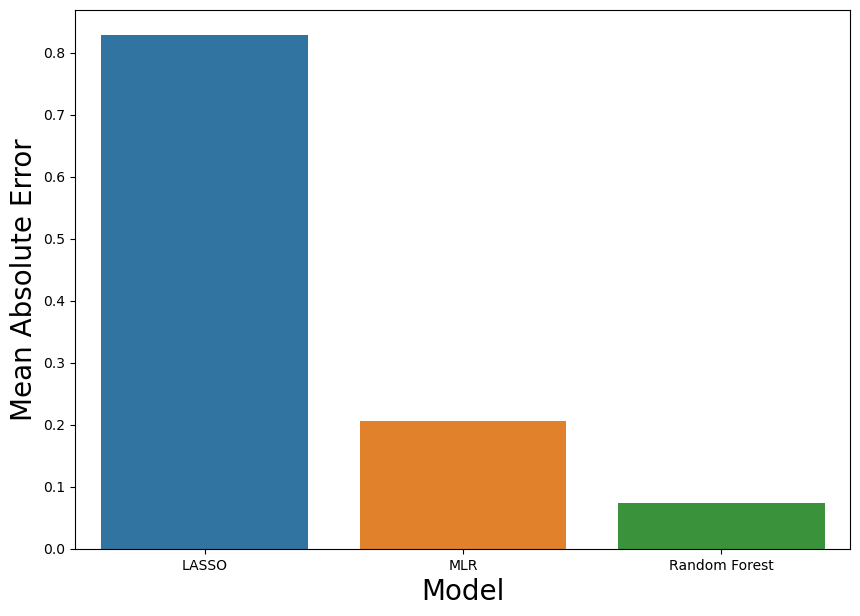

In [96]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()